In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv ('/content/drive/MyDrive/buatpas/HeartDiseaseTrain-Test.csv')
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


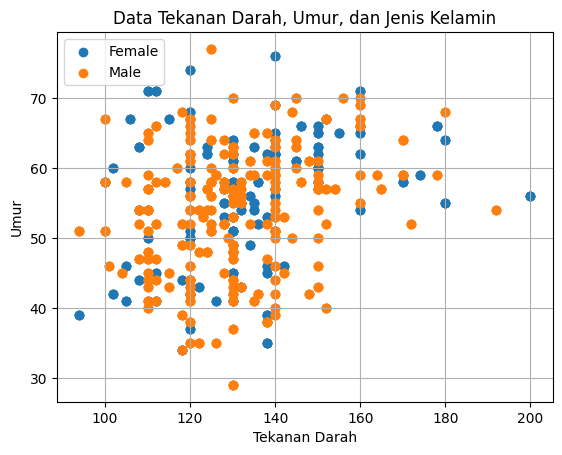

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for sex , d in df.groupby('sex'):
  ax.scatter(d['resting_blood_pressure'],d['age'], label = sex)

  plt.legend(loc='upper left')
  plt.title('Data Tekanan Darah, Umur, dan Jenis Kelamin')
  plt.xlabel('Tekanan Darah')
  plt.ylabel('Umur')
  plt.grid(True)
  plt.show


In [8]:
import numpy as np

x_train = np.array(df[['resting_blood_pressure', 'age']])
y_train = np.array(df['sex'])

print(f'X_train:\n{x_train}\n')
print(f'Y_train: {y_train}')

X_train:
[[125  52]
 [140  53]
 [145  70]
 ...
 [110  47]
 [110  50]
 [120  54]]

Y_train: ['Male' 'Male' 'Male' ... 'Male' 'Female' 'Male']


In [9]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [10]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 1 1 ... 1 0 1]


In [11]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors= K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
Tekanan_Darah = 140
Umur = 53
x_new = np.array([Tekanan_Darah, Umur]).reshape(1,-1)
x_new

array([[140,  53]])

In [13]:
y_new = model.predict(x_new)
y_new

array([1])

In [14]:
lb.inverse_transform(y_new)

array(['Male'], dtype='<U6')

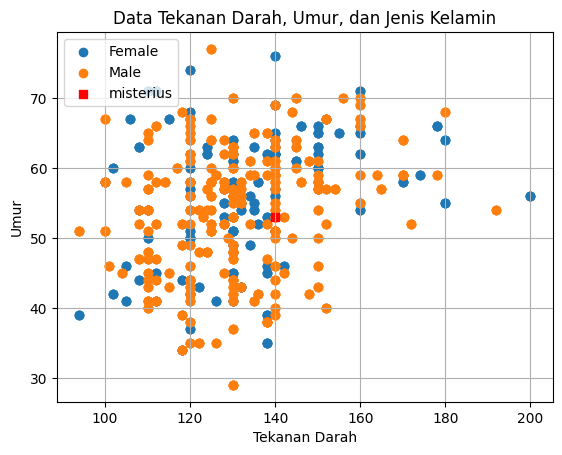

In [15]:
fig, ax = plt.subplots()
for sex , d in df.groupby('sex'):
  ax.scatter(d['resting_blood_pressure'],d['age'], label = sex)

plt.scatter(Tekanan_Darah,
            Umur,
            marker = 's',
            color = 'red',
            label = 'misterius')

plt.legend(loc='upper left')
plt.title('Data Tekanan Darah, Umur, dan Jenis Kelamin')
plt.xlabel('Tekanan Darah')
plt.ylabel('Umur')
plt.grid(True)
plt.show()

In [16]:
misterius = np.array([Tekanan_Darah,Umur])
misterius

array([140,  53])

In [17]:
x_train

array([[125,  52],
       [140,  53],
       [145,  70],
       ...,
       [110,  47],
       [110,  50],
       [120,  54]])

In [18]:
from scipy.spatial.distance import euclidean
data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[15.033296378372908,
 0.0,
 17.72004514666935,
 11.313708498984761,
 9.219544457292887,
 40.311288741492746,
 26.476404589747453,
 20.09975124224178,
 21.18962010041709,
 18.027756377319946,
 33.28663395418648,
 12.806248474865697,
 29.068883707497267,
 2.0,
 12.041594578792296,
 29.068883707497267,
 2.0,
 16.0312195418814,
 20.223748416156685,
 5.0,
 7.0,
 36.76955262170047,
 36.87817782917155,
 11.180339887498949,
 22.825424421026653,
 9.433981132056603,
 13.45362404707371,
 6.4031242374328485,
 10.44030650891055,
 40.049968789001575,
 21.93171219946131,
 20.223748416156685,
 10.770329614269007,
 26.248809496813376,
 11.40175425099138,
 12.206555615733702,
 15.132745950421556,
 6.324555320336759,
 16.278820596099706,
 12.649110640673518,
 23.323807579381203,
 20.024984394500787,
 12.806248474865697,
 21.18962010041709,
 8.246211251235321,
 11.0,
 13.0,
 40.162171256046406,
 14.317821063276353,
 24.041630560342615,
 11.180339887498949,
 4.0,
 15.132745950421556,
 20.396078054371138,
 

In [19]:
df['jarak'] = data_jarak
df.sort_values(['jarak'])

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target,jarak
813,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0,0.000000
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0,0.000000
968,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0,0.000000
692,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0,0.000000
923,54,Male,Typical angina,140,239,Lower than 120 mg/ml,ST-T wave abnormality,160,No,1.2,Downsloping,Zero,Fixed Defect,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,54,Male,Atypical angina,192,283,Lower than 120 mg/ml,Normal,195,No,0.0,Downsloping,One,Reversable Defect,0,52.009614
175,56,Female,Typical angina,200,288,Greater than 120 mg/ml,Normal,133,Yes,4.0,Upsloping,Two,Reversable Defect,0,60.074953
508,56,Female,Typical angina,200,288,Greater than 120 mg/ml,Normal,133,Yes,4.0,Upsloping,Two,Reversable Defect,0,60.074953
688,56,Female,Typical angina,200,288,Greater than 120 mg/ml,Normal,133,Yes,4.0,Upsloping,Two,Reversable Defect,0,60.074953


In [20]:
x_test = np.array([[148,161], [138,106], [110,118], [140,164]])
y_test = lb.transform(np.array(['Male','Female','Male','Male'])).flatten()

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}')

x_test:
[[148 161]
 [138 106]
 [110 118]
 [140 164]]

y_test:
[1 0 1 1]


In [21]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0])

In [22]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy:{acc}')

accuracy:0.5


In [23]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'precision:{prec}')

precision:1.0


In [24]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print(f'recall: {rec}')

recall: 0.3333333333333333


In [25]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.5


In [26]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [27]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.3333333333333333
